In [1]:
import pandas as pd
import os

### Read in new Dataframe

In [3]:
data = pd.read_csv('combined_months.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.shape

(186850, 6)

### Check where all values null 

In [10]:
# find rows where all col/row are null
data[data.isnull().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
data[data.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### del all nan rows anyway no use

In [11]:
data.dropna(how= 'all', inplace = True)

In [12]:
data.shape

(186305, 6)

In [13]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Check the null values

In [14]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### remove some unnecessary rows before converting

In [21]:
repeated_headers = data[data['Order ID'] == 'Order ID']
print(repeated_headers)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


In [19]:
data.drop(data[data['Order ID'] == 'Order ID'].index, inplace=True)

In [20]:
data.shape

(185950, 6)

### Convert data type

In [26]:
# Convert Order ID and Quantity order columns to integer

# First, convert to numeric (handles strings and bad values)
data['Order ID'] = pd.to_numeric(data['Order ID'], errors='coerce')
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors = 'coerce')

# Now convert to nullable integer type (handles NaNs safely)
data['Order ID'] = data['Order ID'].astype('Int64')
data['Quantity Ordered'] = data['Quantity Ordered'].astype('Int64')

In [30]:
# check and confirm
data[['Order ID','Quantity Ordered']].dtypes

Order ID            Int64
Quantity Ordered    Int64
dtype: object

#### convert price into float

In [32]:
data['Price Each'] = pd.to_numeric(data['Price Each'], errors = 'coerce')

In [33]:
data['Price Each'].dtypes

dtype('float64')

#### convert Order date into datetime

In [35]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')

C:\Users\dell\AppData\Local\Temp\ipykernel_17176\3469740475.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')


In [38]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  Int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  Int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: Int64(2), datetime64[ns](1), float64(1), object(2)
memory usage: 10.3+ MB


#### adding new date columns

In [42]:
#This is helpful for:

#Hourly sales trends
#Monthly analysis
#Peak sales times, etc.

In [57]:
data['Order month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.month
data['Order day of week'] = data['Order Date'].dt.dayofweek

In [58]:
# which is great for grouping by month.

data['Month'] = data['Order Date'].dt.to_period('M')

In [59]:
# correct the index number after clean and drop
data.reset_index(drop=True, inplace=True)

In [60]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order month,Order Year,Order day of week
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.9,4,4,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,4,4,6
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.0,4,4,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,4,4,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,4,4,1


### Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:



### Task1) What was the best month for sales? How much was earned that month?

In [47]:
# First create the sales
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [48]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99


In [49]:
data.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Sales
count,185950.0,185950.0,185950.000000,185950,185950.0
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,185.490917
min,141234.0,1.0,2.990000,2019-01-01 03:07:00,2.99
25%,185831.25,1.0,11.950000,2019-04-16 21:05:15,11.95
50%,230367.5,1.0,14.950000,2019-07-17 20:40:30,14.95
75%,275035.75,1.0,150.000000,2019-10-26 08:14:00,150.0
max,319670.0,9.0,1700.000000,2020-01-01 05:13:00,3400.0
std,51512.73711,0.442793,332.731330,NaN,332.919771


In [51]:
data['Order Date'].isnull().sum()

0

In [65]:
best_month_of_sale = data.groupby('Order month')['Sales'].sum().reset_index()
best_month_of_sale

,Order month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [69]:
best_sale = best_month_of_sale.loc[best_month_of_sale['Sales'].idxmax()]
best_sale

Order month          12.0
Sales          4613443.34
Name: 11, dtype: Float64

In [70]:
# Year wise ckeck
month = data.groupby('Month')['Sales'].sum().reset_index()
month

,Month,Sales
0,2019-01,1813586.44
1,2019-02,2202022.42
2,2019-03,2807100.38
3,2019-04,3390670.24
4,2019-05,3152606.75
5,2019-06,2577802.26
6,2019-07,2647775.76
7,2019-08,2244467.88
8,2019-09,2097560.13
9,2019-10,3736726.88


In [72]:
best = month.loc[month['Sales'].idxmax()]
best

Month       2019-12
Sales    4613443.34
Name: 11, dtype: object

In [80]:
import matplotlib.pyplot as plt

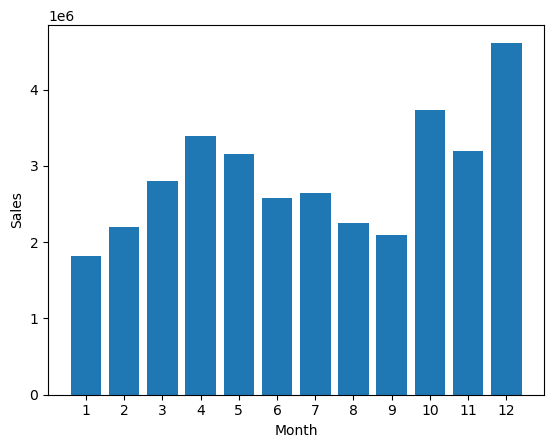

In [86]:
months = range(1,13)
plt.bar(months, best_month_of_sale['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

### What city sold the most product?

In [79]:
data['Purchase Address'].value_counts()

Purchase Address
193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
197 Center St, San Francisco, CA 94016    7
727 9th St, San Francisco, CA 94016       7
                                         ..
414 Sunset St, Los Angeles, CA 90001      1
191 Wilson St, Atlanta, GA 30301          1
359 Meadow St, New York City, NY 10001    1
703 Highland St, Dallas, TX 75001         1
220 12th St, San Francisco, CA 94016      1
Name: count, Length: 140787, dtype: int64

### Step 1: Extract City from Purchase Address

In [87]:
# Extract city and state from Purchase Address
data['City'] = data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].strip().split(' ')[0]})")

In [88]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order month,Order Year,Order day of week,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.9,4,4,4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,4,4,6,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.0,4,4,4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,4,4,4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,4,4,1,Los Angeles (CA)


### Step 2: Find which city sold the most product

In [113]:
city_sale = data.groupby('City')['Quantity Ordered'].sum().reset_index()
city_sale

,City,Quantity Ordered
0,Atlanta (GA),16602
1,Austin (TX),11153
2,Boston (MA),22528
3,Dallas (TX),16730
4,Los Angeles (CA),33289
5,New York City (NY),27932
6,Portland (ME),2750
7,Portland (OR),11303
8,San Francisco (CA),50239
9,Seattle (WA),16553


In [114]:
# find most sold city

most_sale = city_sale.loc[city_sale['Quantity Ordered'].idxmax()]
most_sale

City                San Francisco (CA)
Quantity Ordered                 50239
Name: 8, dtype: object

<Figure size 1200x600 with 0 Axes>

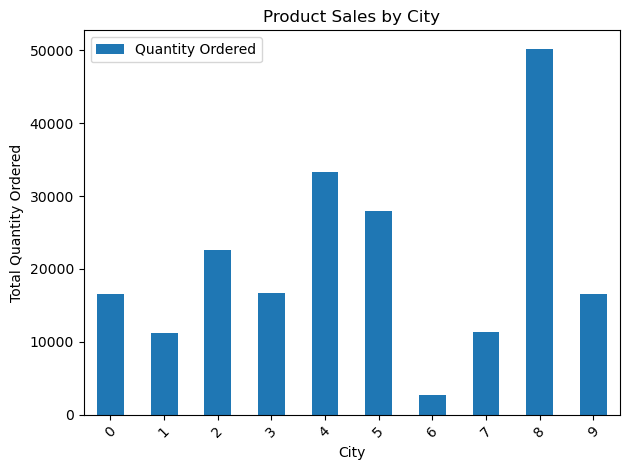

In [115]:

plt.figure(figsize=(12,6))
city_sale.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.title('Product Sales by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [111]:
data['City'].value_counts()

City
San Francisco (CA)    44732
Los Angeles (CA)      29605
New York City (NY)    24876
Boston (MA)           19934
Atlanta (GA)          14881
Dallas (TX)           14820
Seattle (WA)          14732
Portland (OR)         10010
Austin (TX)            9905
Portland (ME)          2455
Name: count, dtype: int64

In [91]:
# for one
data[data['City'] == 'Atlanta (GA)']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order month,Order Year,Order day of week,City
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",2019-04,11.95,4,4,4,Atlanta (GA)
14,176571,Lightning Charging Cable,1,14.95,2019-04-19 14:29:00,"253 Johnson St, Atlanta, GA 30301",2019-04,14.95,4,4,4,Atlanta (GA)
26,176582,Bose SoundSport Headphones,1,99.99,2019-04-27 12:20:00,"178 Lincoln St, Atlanta, GA 30301",2019-04,99.99,4,4,5,Atlanta (GA)
35,176589,Lightning Charging Cable,1,14.95,2019-04-04 12:23:00,"846 Highland St, Atlanta, GA 30301",2019-04,14.95,4,4,3,Atlanta (GA)
69,176623,27in FHD Monitor,1,149.99,2019-04-20 23:51:00,"807 12th St, Atlanta, GA 30301",2019-04,149.99,4,4,5,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...,...
185907,259316,AAA Batteries (4-pack),1,2.99,2019-09-16 16:48:00,"369 Johnson St, Atlanta, GA 30301",2019-09,2.99,9,9,0,Atlanta (GA)
185911,259320,ThinkPad Laptop,1,999.99,2019-09-02 10:51:00,"857 Elm St, Atlanta, GA 30301",2019-09,999.99,9,9,0,Atlanta (GA)
185920,259329,Lightning Charging Cable,1,14.95,2019-09-05 19:00:00,"480 Lincoln St, Atlanta, GA 30301",2019-09,14.95,9,9,3,Atlanta (GA)
185923,259332,Apple Airpods Headphones,1,150.00,2019-09-16 19:21:00,"782 Lake St, Atlanta, GA 30301",2019-09,150.0,9,9,0,Atlanta (GA)


### Task3) What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [116]:
data['Hour'] = data['Order Date'].dt.hour


In [117]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order month,Order Year,Order day of week,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.9,4,4,4,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,4,4,6,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.0,4,4,4,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,4,4,4,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,4,4,1,Los Angeles (CA),9


In [118]:
hourly_orders = data.groupby('Hour').size()
hourly_orders

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64

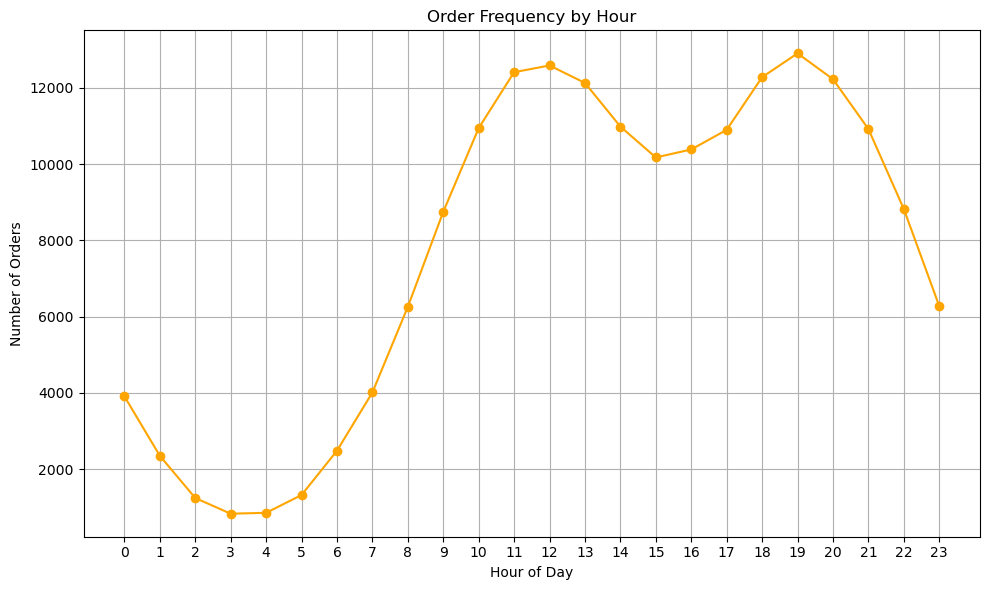

In [119]:
plt.figure(figsize=(10,6))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o', linestyle='-', color='orange')
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
data.drop('Order day of week',axis = 1, inplace = True)

In [123]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order month,Order Year,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.9,4,4,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,4,4,Boston (MA),22


### Task4) What products are most often sold together?

In [125]:
# Step 1: Look at duplicate Order IDs

In [126]:
# Filter only orders with multiple items
multi_item_orders = data[data.duplicated(subset='Order ID', keep=False)]


In [127]:
# Group all products in the same order into one string
multi_item_orders['Grouped Products'] = multi_item_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Drop duplicates so we don’t count the same combination multiple times
multi_item_orders = multi_item_orders[['Order ID', 'Grouped Products']].drop_duplicates()


C:\Users\dell\AppData\Local\Temp\ipykernel_17176\3020733787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_item_orders['Grouped Products'] = multi_item_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [128]:
from collections import Counter
from itertools import combinations

# Count product pairs
combo_counter = Counter()

for products in multi_item_orders['Grouped Products']:
    items = products.split(',')
    # Count all 2-product combinations
    combo_counter.update(Counter(combinations(sorted(items), 2)))

# Print the 10 most common pairs
for pair, count in combo_counter.most_common(10):
    print(f"{pair}: {count} times")

('Lightning Charging Cable', 'iPhone'): 1015 times
('Google Phone', 'USB-C Charging Cable'): 999 times
('Wired Headphones', 'iPhone'): 462 times
('Google Phone', 'Wired Headphones'): 423 times
('Apple Airpods Headphones', 'iPhone'): 373 times
('USB-C Charging Cable', 'Vareebadd Phone'): 368 times
('Bose SoundSport Headphones', 'Google Phone'): 228 times
('USB-C Charging Cable', 'Wired Headphones'): 205 times
('Vareebadd Phone', 'Wired Headphones'): 149 times
('Lightning Charging Cable', 'Wired Headphones'): 129 times


#                                                            Thank you